In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Importing* necessary *libraries*

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# *Dataset 1*

In [15]:
file_paths = {
    '1_ef_b': 'drive/My Drive/Datasets/1_ef_b.csv',
    '1_nrml_b': 'drive/My Drive/Datasets/1_nrml_b.csv',
    '1_og_b': 'drive/My Drive/Datasets/1_og_b.csv',
}

Split the dataset into training and testing *dataset*

In [40]:
datasets = {
    key: {'X_train': None, 'X_test': None, 'y_train':None, 'y_test': None,} for key in file_paths.keys()
}

for key, value in file_paths.items():
    df = pd.read_csv(value)

    target = df['LUNG_CANCER']
    features = df.drop(['LUNG_CANCER'], axis=1, errors='ignore')

    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )

    datasets[key]['X_train'] = X_train
    datasets[key]['X_test'] = X_test
    datasets[key]['y_train'] = y_train
    datasets[key]['y_test'] = y_test


Train and Evaluating the *Model*

In [35]:

evaluation_results = {
    key: {'K_values': [], 'accuracies': [], 'conf_matrices':[], 'class_reports':[]} for key in datasets.keys()
}

k_range = range(1, 11)

for key, data in datasets.items():

    accuracies = []
    conf_matrices = []
    class_reports = []

    for k in k_range:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(data['X_train'], data['y_train'])

      y_pred = knn.predict(data['X_test'])

      accuracy = accuracy_score(data['y_test'], y_pred)
      conf_matrix = confusion_matrix(data['y_test'], y_pred)
      class_report = classification_report(data['y_test'], y_pred, output_dict=True)

      accuracies.append(accuracy)
      conf_matrices.append(conf_matrix)
      class_reports.append(class_report)

    evaluation_results[key]['K_values'] = list(k_range)
    evaluation_results[key]['accuracies'] = accuracies
    evaluation_results[key]['conf_matrices'] = conf_matrices
    evaluation_results[key]['class_reports'] = class_reports

print(evaluation_results)

{'1_ef_b': {'K_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'accuracies': [0.8148148148148148, 0.8425925925925926, 0.8611111111111112, 0.8425925925925926, 0.8425925925925926, 0.8425925925925926, 0.8425925925925926, 0.8611111111111112, 0.8518518518518519, 0.8611111111111112], 'conf_matrices': [array([[41,  6],
       [14, 47]]), array([[46,  1],
       [16, 45]]), array([[46,  1],
       [14, 47]]), array([[46,  1],
       [16, 45]]), array([[43,  4],
       [13, 48]]), array([[43,  4],
       [13, 48]]), array([[43,  4],
       [13, 48]]), array([[46,  1],
       [14, 47]]), array([[45,  2],
       [14, 47]]), array([[46,  1],
       [14, 47]])], 'class_reports': [{'0.0': {'precision': 0.7454545454545455, 'recall': 0.8723404255319149, 'f1-score': 0.803921568627451, 'support': 47.0}, '1.0': {'precision': 0.8867924528301887, 'recall': 0.7704918032786885, 'f1-score': 0.8245614035087719, 'support': 61.0}, 'accuracy': 0.8148148148148148, 'macro avg': {'precision': 0.8161234991423671, 'recall':

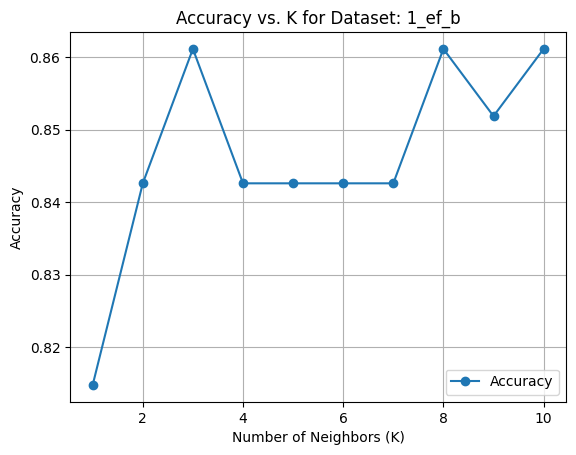

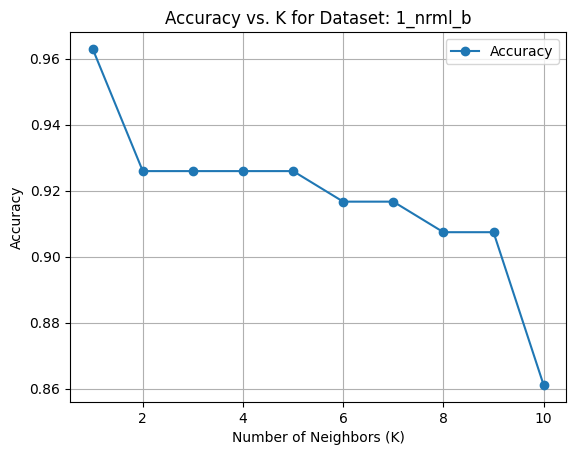

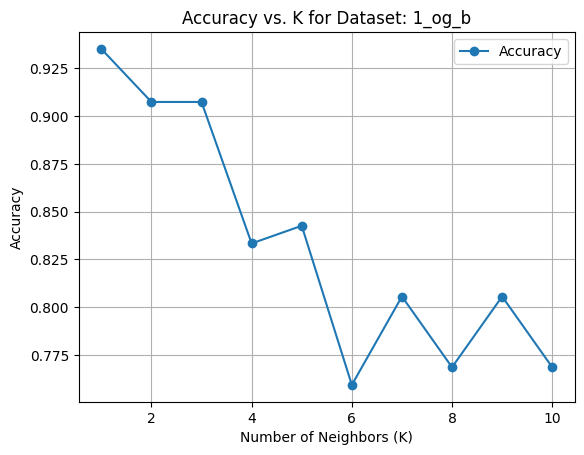

In [36]:
for key, result in evaluation_results.items():
    k_values = result['K_values']
    accuracies = result['accuracies']

    plt.figure()
    plt.plot(k_values, accuracies, marker='o', label='Accuracy')
    plt.title(f"Accuracy vs. K for Dataset: {key}")
    plt.xlabel("Number of Neighbors (K)")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()

From the result above, I can see that starting values of K (i.e 1, 2,3 etc) might be overfitting whereas the ending values of K (i.e 8, 9, 10 etc) are underfitting.

So I will choose the best value between 4 and 8.

The best value seems to be 5 as it has the highest accuracy between the k values 4 and 8

Visualizing with Confusion Matrix and Accuracy Bar Plot

Dataset: 1_ef_b
Accuracy for K=5: 0.84
Confusion Matrix for K=5:
[[43  4]
 [13 48]]
------------------------------


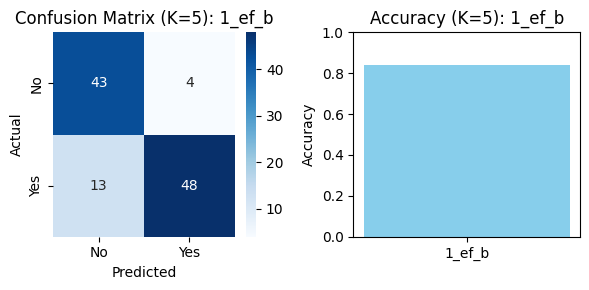

Dataset: 1_nrml_b
Accuracy for K=5: 0.93
Confusion Matrix for K=5:
[[47  0]
 [ 8 53]]
------------------------------


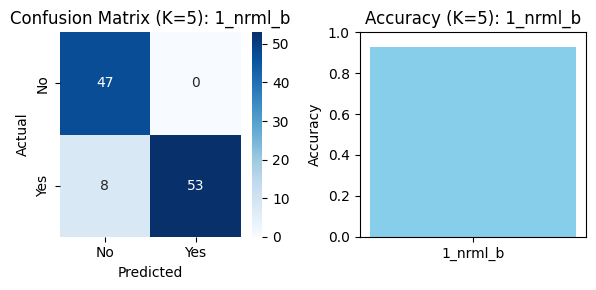

Dataset: 1_og_b
Accuracy for K=5: 0.84
Confusion Matrix for K=5:
[[45  2]
 [15 46]]
------------------------------


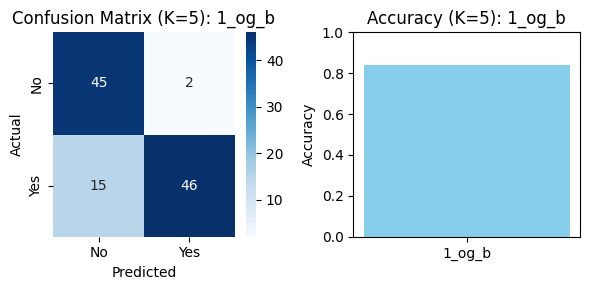

In [38]:
k_index = 4

for key, value in evaluation_results.items():

    accuracy = value['accuracies'][k_index]
    conf_matrix = value['conf_matrices'][k_index]

    print(f"Dataset: {key}")
    print(f"Accuracy for K=5: {accuracy:.2f}")
    print(f"Confusion Matrix for K=5:\n{conf_matrix}")
    print("-" * 30)

    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    sns.heatmap(
        conf_matrix, annot=True, fmt='d', cmap='Blues',
        xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
        ax=axes[0]
    )
    axes[0].set_title(f"Confusion Matrix (K=5): {key}")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    axes[1].bar([key], [accuracy], color='skyblue', width=0.5)
    axes[1].set_title(f"Accuracy (K=5): {key}")
    axes[1].set_ylim(0, 1)
    axes[1].set_ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

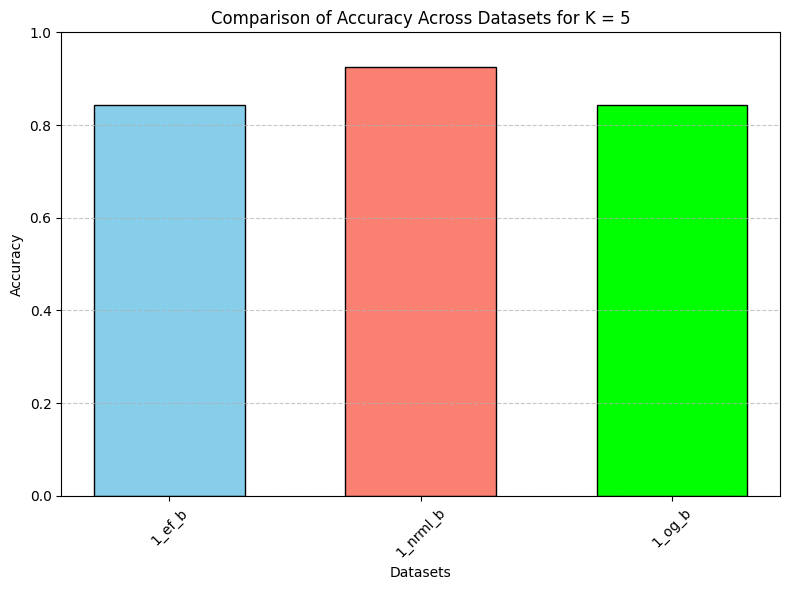

In [39]:
k_index = 4

dataset_names = list(evaluation_results.keys())
accuracies = [evaluation_results[key]['accuracies'][k_index] for key in dataset_names]

plt.figure(figsize=(8, 6))
colors = ['skyblue', 'salmon', 'lime', 'gold']
plt.bar(dataset_names, accuracies, color=colors, edgecolor='black', width=0.6)

plt.title("Comparison of Accuracy Across Datasets for K = 5")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Datasets")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As we can see, the best accuracy came from the normalised dataset.

# Dataset 2 (Categorical)

In [48]:
file_paths = {
    '2_nrml': 'drive/My Drive/Datasets/dataset2/2_nrml.csv',
    '2_og': 'drive/My Drive/Datasets/dataset2/2_og.csv',
}

Split the dataset into training and testing *dataset*

In [50]:
datasets = {
    key: {'X_train': None, 'X_test': None, 'y_train': None, 'y_test': None} for key in file_paths.keys()
}

for key, value in file_paths.items():
    df = pd.read_csv(value)


    target = df['Level']
    features = df.drop(['Level'], axis=1, errors='ignore')

    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )

    datasets[key]['X_train'] = X_train
    datasets[key]['X_test'] = X_test
    datasets[key]['y_train'] = y_train
    datasets[key]['y_test'] = y_test

Train and Evaluating the *Model*

In [51]:
evaluation_results = {
    key: {'K_values': [], 'mse': [], 'r2': []} for key in datasets.keys()
}

k_range = range(1, 11)

for key, data in datasets.items():
    mse_values = []
    r2_values = []

    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(data['X_train'], data['y_train'])

        y_pred = knn.predict(data['X_test'])

        mse = mean_squared_error(data['y_test'], y_pred)
        r2 = r2_score(data['y_test'], y_pred)

        mse_values.append(mse)
        r2_values.append(r2)

    evaluation_results[key]['K_values'] = list(k_range)
    evaluation_results[key]['mse'] = mse_values
    evaluation_results[key]['r2'] = r2_values

print(evaluation_results)

{'2_nrml': {'K_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'mse': [0.0, 0.0003125, 0.00013888888888888892, 7.8125e-05, 4.9999999999999975e-05, 3.472222222222221e-05, 0.00012755102040816328, 0.000390625, 0.0008487654320987654, 0.0014375000000000002], 'r2': [1.0, 0.9981253046379963, 0.9991668020613317, 0.9995313261594991, 0.9997000487420794, 0.999791700515333, 0.9992348182195904, 0.9976566307974954, 0.9949082348192493, 0.9913764013347831]}, '2_og': {'K_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'mse': [0.0, 0.00125, 0.0022222222222222227, 0.0028125, 0.0032000000000000006, 0.0034722222222222216, 0.004081632653061225, 0.005390625, 0.007839506172839508, 0.011500000000000002], 'r2': [1.0, 0.9981253046379963, 0.9966672082453268, 0.9957819354354918, 0.9952007798732706, 0.9947925128833232, 0.9938785457567227, 0.9919153762513592, 0.9882426513099029, 0.9827528026695662]}}


Plotting the Mean Squared Error values vs K

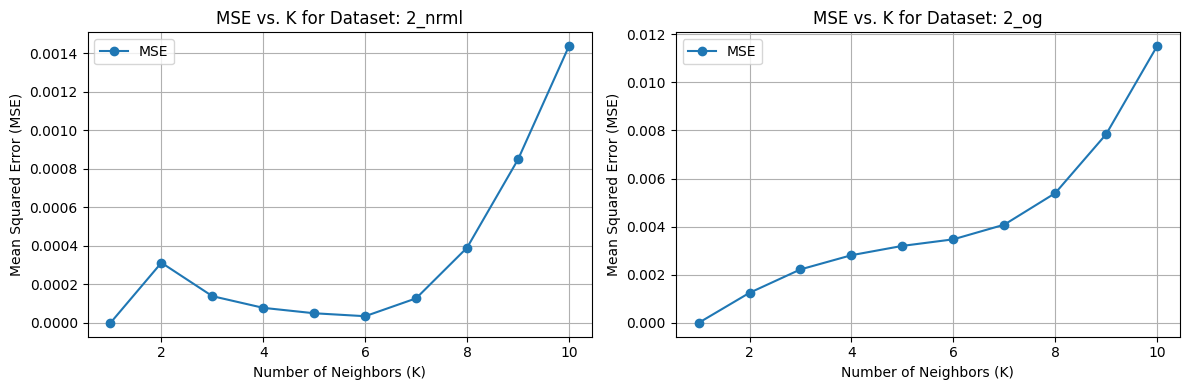

In [56]:
num_datasets = len(evaluation_results)

fig, axes = plt.subplots(1, num_datasets, figsize=(6 * num_datasets, 4))

for idx, (key, result) in enumerate(evaluation_results.items()):
    k_values = result['K_values']
    mse = result['mse']

    ax = axes[idx]
    ax.plot(k_values, mse, marker='o', label='MSE')
    ax.set_title(f"MSE vs. K for Dataset: {key}")
    ax.set_xlabel("Number of Neighbors (K)")
    ax.set_ylabel("Mean Squared Error (MSE)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

Dataset: 2_nrml
MSE for K=6: 0.0000
R² Score for K=6: 0.9998
------------------------------


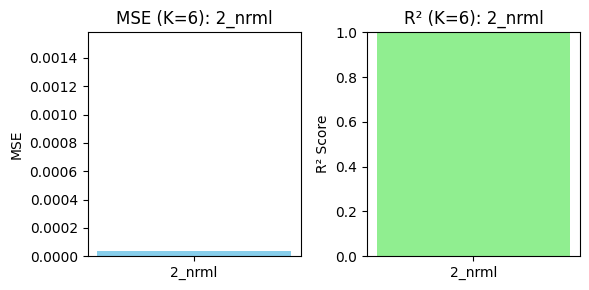

Dataset: 2_og
MSE for K=6: 0.0035
R² Score for K=6: 0.9948
------------------------------


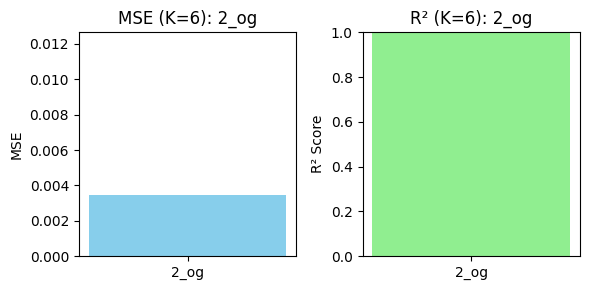

In [62]:
k_index = 5

for key, value in evaluation_results.items():
    mse = value['mse'][k_index]
    r2 = value['r2'][k_index]

    print(f"Dataset: {key}")
    print(f"MSE for K=6: {mse:.4f}")
    print(f"R² Score for K=6: {r2:.4f}")
    print("-" * 30)

    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    axes[0].bar([key], [mse], color='skyblue', width=0.5)
    axes[0].set_title(f"MSE (K=6): {key}")
    axes[0].set_ylim(0, max(value['mse']) * 1.1)
    axes[0].set_ylabel("MSE")

    axes[1].bar([key], [r2], color='lightgreen', width=0.5)
    axes[1].set_title(f"R² (K=6): {key}")
    axes[1].set_ylim(0, 1)
    axes[1].set_ylabel("R² Score")

    plt.tight_layout()
    plt.show()


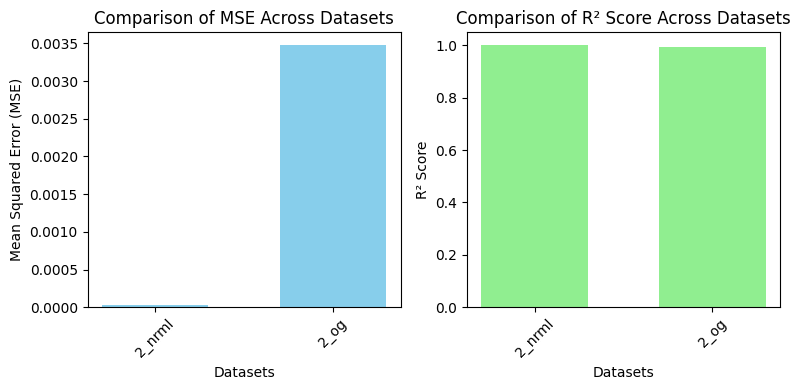

In [64]:
k_index = 5
dataset_names = list(evaluation_results.keys())
mse_values = [evaluation_results[key]['mse'][k_index] for key in dataset_names]
r2_values = [evaluation_results[key]['r2'][k_index] for key in dataset_names]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].bar(dataset_names, mse_values, color='skyblue', width=0.6)
axes[0].set_title("Comparison of MSE Across Datasets")
axes[0].set_ylabel("Mean Squared Error (MSE)")
axes[0].set_xlabel("Datasets")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(dataset_names, r2_values, color='lightgreen', width=0.6)
axes[1].set_title("Comparison of R² Score Across Datasets")
axes[1].set_ylabel("R² Score")
axes[1].set_xlabel("Datasets")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()
